The PDE approach in option pricing is applicable in low-dimensional state-variable, Markovian problems. It is relatively quick when the PDE is solved by the **finite difference method**, barring a closed-form solution to the PDE. Also the finite-difference methods can work dynamically backward in time, rendering pricing of American and Bermudan options easier.

The finite difference method is a popular numerical technique for derivative pricing. It numerically solves the Black-Scholes type PDE, by discretizing the time (or time to maturity $\tau$ in the below grids) and the (log) price $x$ of the underlying security. The difference between the various derivatives lies in the boundary conditions.

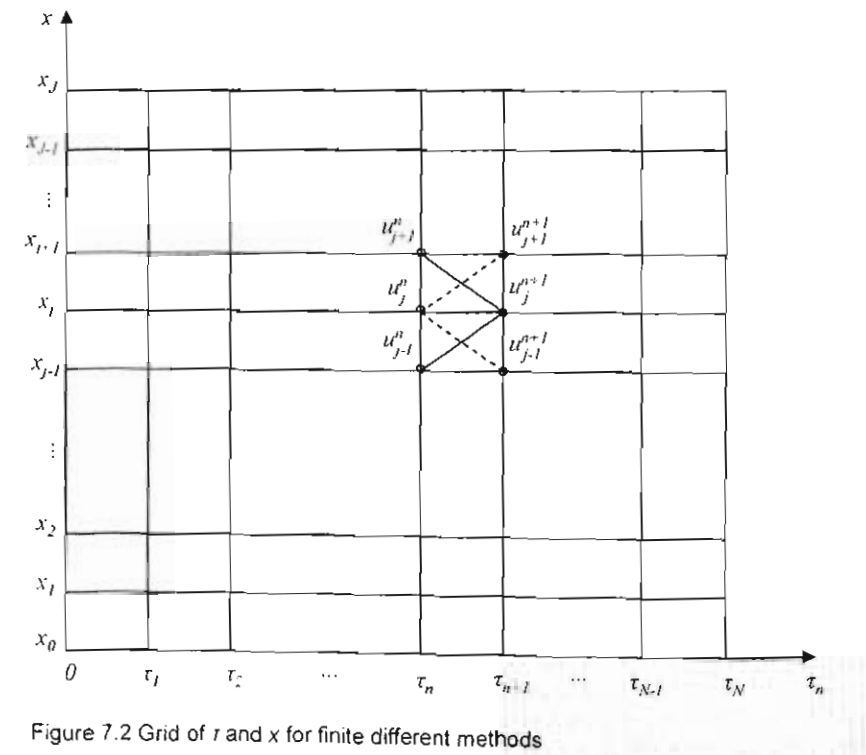

- The **explicit difference method** uses the forward difference at time $\tau_n$ and the second-order central difference at $x_j$: $\frac{u_j^{n+1}-u_j^n}{\Delta\tau}=\frac{u_{j+1}^n}-2u_j^n+u_{j-1}^n{(\Delta x)^2}$.
    - Pros: By rearranging the terms, $u_j^{n+1}$ can be expressed as a linear combination of $u_{j+1}^n$, $u_j^n$ and $u_{j-1}^n$, and thus $u^{n+1}$ can be more iteratively and efficiently solved one-by-one without solving an outright linear system of equations.
    - Cons: The explicit scheme is not absolutely stable, i.e. when $\Delta t/(\Delta x)^2\geq 1/2$, or when the grids in $x$ is too fine, the numerical result is unstable, i.e. may blow up to infinity.

- The **implicit difference method** uses the backward difference at time $\tau_{n+1}$ and the second-order central difference at $x_j$: $\frac{u_j^{n+1}-u_j^n}{\Delta\tau}=\frac{u_{j+1}^{n+1}}-2u_j^{n+1}+u_{j-1}^{n+1}{(\Delta x)^2}$.
    - Pros: The implicit schemes is absolutely stable, regardless of $\Delta_t$ and $\Delta_x$.
    - Cons: It is no longer possible to just solve for $u^{n+1}_j$ one-by-one, but one has to resort to solving a system of linear equations.
    
- The **Crank-Nicolson method** uses the central difference at time $(\tau_{n+1}+\tau_n)/2$ and the second-order central difference at $x_j$: $\frac{u_j^{n+1}-u_j^n}{\Delta\tau}=\frac{1}{2}(\frac{u_{j+1}^n}-2u_j^n+u_{j-1}^n{(\Delta x)^2}+\frac{u_{j+1}^{n+1}}-2u_j^{n+1}+u_{j-1}^{n+1}{(\Delta x)^2})$.
    - Pros: It is also absolutely stable.
    - Cons: It requires a system of linear equations be solved. Also, it is *not strongly absolutely stable*: for large time steps, harmonics in the Crank-Nicolson finite difference solution will effectively not dampened from one time step to the next, opening up the possibility that unwanted high-frequency oscillations can creep into the numerical solution. This is a problem when there is an outright discontinuity in the terminal value function. The problem is especially noticable if the discontinuity in the value function is close in both time-to-expirary and space. 

More generally, the above three schemes can be analysed where the difference in time is a convex combination of forward and backward difference. Denote $\theta=1$ the implicit scheme, and $\theta=0$ the explicit scheme, then $\theta=\frac{1}{2}$ is the Crank-Nicolson. We thus have the following **von Neumann stability criterion** (assuming constant coefficient PDE)
\begin{align}
1\geq\theta\geq \frac{1}{2}-\frac{(\Delta_x)^2}{\Delta_t}\left(\frac{\sigma^2}{\sigma^4+\mu^2\Delta_x^2+|\mu^2\Delta_x^2-\sigma^4|}\right).
\end{align}

Several comments.
- From the above, it immediately follows that why implicit and Crank-Nicolson scheme is absolutely stable regardless of $\Delta_x$ and $\Delta_t$, while the stablility of explicit schemes depends on $\frac{(\Delta_x)^2}{\Delta_t}$.
- The deduction of the criterion above relies on the Fourier analysis on the true function, and how different $\theta$ play into the modulus of the amplification factor: it has to be less than or euqal to one for it to be stable, and strictly less than $1$ for it to be strongly absolutely stable.

## References

- < A Practical Guide to Quantitative Finance Interviews >
- < Interest Rate Modeling >, Sections 2.1-2.3.